# Feature extraction Notebook

This notbook contains differnt feature extracted for classification 

In [56]:
!pip install webcolors==1.3

  Created wheel for webcolors: filename=webcolors-1.3-py3-none-any.whl size=13013 sha256=19655366e63324e6afdf79a0c62a44e50f70b44dad85dd19e92c188edf640cb5
  Stored in directory: c:\users\rites\appdata\local\pip\cache\wheels\49\2e\e7\5078ca745677e53dae9856cf41c114b7b91ada9d5f4d1a8d54
Successfully built webcolors


In [57]:
# imporet required library
import os

import numpy as np
import pandas as pd

import cv2
import matplotlib.pyplot as plt
import webcolors

In [2]:
# load path to dataset
path = '../data/classification'
classes = ['swiggy', 'others']


In [3]:
# create dataframe
data = [pd.DataFrame(),pd.DataFrame()]

for ii, cls in enumerate(classes):
    images = os.listdir(f"{path}/{cls}")
    data[ii]['image_path'] = images
    data[ii]['image_path'] = data[ii]['image_path'].apply(lambda x : f"{path}/{cls}/{x}")
    
    

In [4]:
data[0]['class'] ="swiggy"
data[1]['class'] ="other"

In [5]:
df = pd.concat(data).reset_index(drop=True)
df.head()

,image_path,class
0,../data/classification/swiggy/0.jpg,swiggy
1,../data/classification/swiggy/1.jpg,swiggy
2,../data/classification/swiggy/10.jpg,swiggy
3,../data/classification/swiggy/100.jpg,swiggy
4,../data/classification/swiggy/101.jpg,swiggy


In [6]:
#read_image
df["image"] = df['image_path'].apply(lambda x: cv2.imread(x))
df.head()

,image_path,class,image
0,../data/classification/swiggy/0.jpg,swiggy,"[[[254, 248, 243], [254, 248, 243], [255, 247,..."
1,../data/classification/swiggy/1.jpg,swiggy,"[[[120, 143, 135], [121, 144, 136], [126, 149,..."
2,../data/classification/swiggy/10.jpg,swiggy,"[[[125, 134, 137], [124, 133, 136], [126, 133,..."
3,../data/classification/swiggy/100.jpg,swiggy,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,../data/classification/swiggy/101.jpg,swiggy,"[[[50, 57, 107], [53, 59, 112], [41, 47, 106],..."


In [7]:
# shape of image
df['height'] = df['image'].apply(lambda x : x.shape[0])
df['weidth'] = df['image'].apply(lambda x : x.shape[1])

In [8]:
df[['height','weidth']].describe()

,height,weidth
count,360.000000,360.000000
mean,282.280556,173.622222
std,228.138810,171.257634
min,30.000000,14.000000
25%,144.750000,75.000000
50%,215.500000,127.000000
75%,359.250000,198.500000
max,2304.000000,1528.000000


300*200

### Feature check

Most of the Swiggy images have high orange or black texture as compared to others. As Swiggy have two different types of shirt. I would just like to check weather its true or not. It can be a good feature.

In [221]:
sample_swiggy = df[df['class']=='swiggy'].sample(6)['image'].apply(lambda x : cv2.cvtColor(x, cv2.COLOR_BGR2RGB))
sample_other = df[df['class']=='other'].sample(6)['image'].apply(lambda x : cv2.cvtColor(x, cv2.COLOR_BGR2RGB))

In [207]:
from sklearn.cluster import KMeans
import seaborn as sns
from collections import Counter

In [245]:
plot_prams = []
for image in sample_swiggy:
    image2d = image.reshape((-1,3))
    kmeans = KMeans(5)
    kmeans.fit(image2d)
    
    centre = np.uint8(kmeans.cluster_centers_)
    labels = kmeans.labels_
    cl=[webcolors.rgb_to_hex((cnt[0], cnt[1], cnt[2])) for cnt in centre]
    lb = Counter(labels).values()
    max_ = max(lb)
    explode = list(map(lambda x : 0.1 if x==max_ else 0, lb))
    
    plot_prams.append([lb, explode, cl])
    

[]

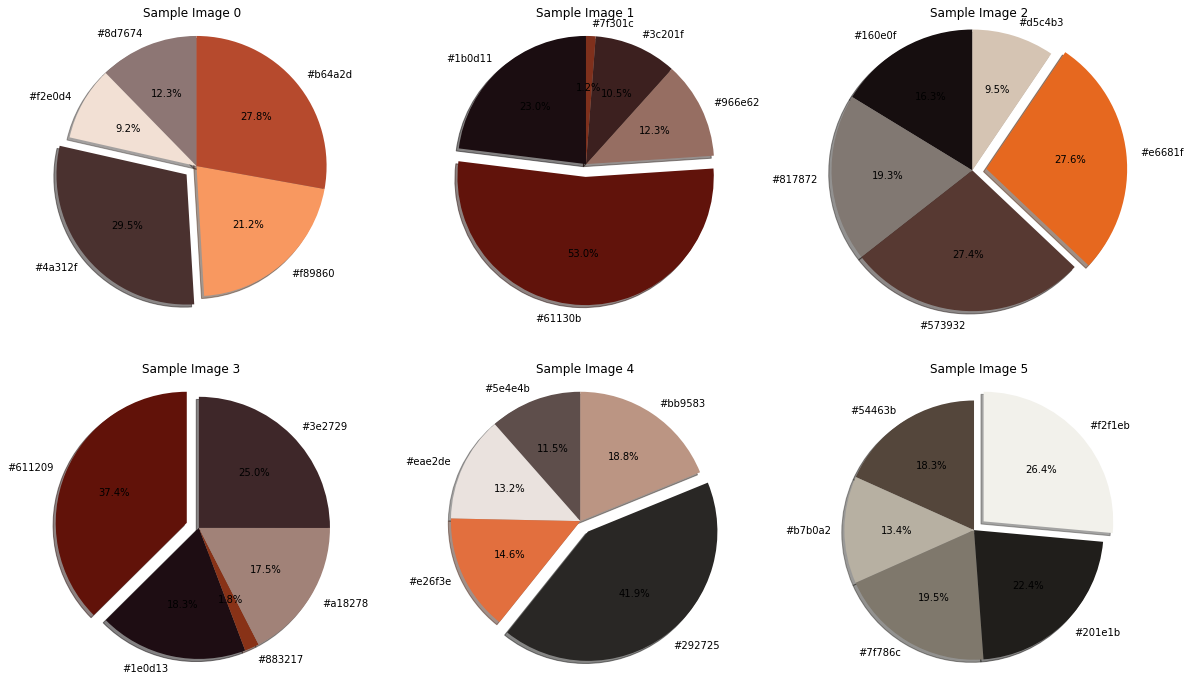

In [246]:
fig, ax = plt.subplots(2,3, figsize=(20,12))

for ii, prams in enumerate(plot_prams):
    ax[ii//3][ii%3].pie(prams[0], explode=prams[1], autopct='%1.1f%%',
        shadow=True, startangle=90, colors=prams[2], labels=prams[2])
    ax[ii//3][ii%3].axis('equal')
    ax[ii//3][ii%3].set_title(f"Sample Image {ii}")
plt.plot()

In [249]:
plot_prams = []
for image in sample_other:
    image2d = image.reshape((-1,3))
    kmeans = KMeans(5)
    kmeans.fit(image2d)
    
    centre = np.uint8(kmeans.cluster_centers_)
    labels = kmeans.labels_
    cl=[webcolors.rgb_to_hex((cnt[0], cnt[1], cnt[2])) for cnt in centre]
    lb = Counter(labels).values()
    max_ = max(lb)
    explode = list(map(lambda x : 0.1 if x==max_ else 0, lb))
    
    plot_prams.append([lb, explode, cl])
    

[]

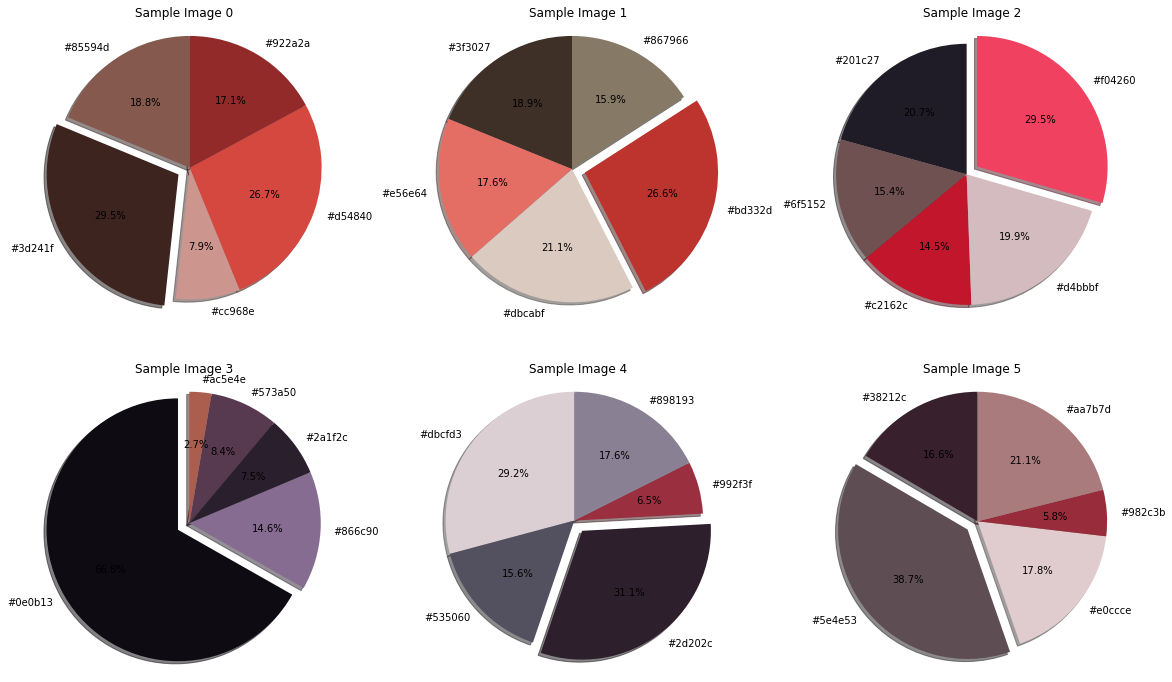

In [250]:
fig, ax = plt.subplots(2,3, figsize=(20,12))

for ii, prams in enumerate(plot_prams):
    ax[ii//3][ii%3].pie(prams[0], explode=prams[1], autopct='%1.1f%%',
        shadow=True, startangle=90, colors=prams[2], labels=prams[2])
    ax[ii//3][ii%3].axis('equal')
    ax[ii//3][ii%3].set_title(f"Sample Image {ii}")
plt.plot()

###  Present of orange seems to be there in both class.

Another feature can be present of Swiggy logo
